In [144]:
from math import exp, log, sin, pi, fabs


def f(x, y):
    return 20 * exp( -( (x-2.5) ** 2 + (y+1.5) ** 2 )/5 ) + 3 * (1 + (sin(0.008 * pi * x * y)) ** 2) + 3 * ( log(2 + (10*(x-2.4)) ** 4 + (10*(y+1.3)) ** 4 ) )/(1 + ((x ** 2 + y ** 2)/100)**0.1)

print (f(0.0,0.00))
print (f(0.01,0.01))

45.03807208308183
36.88033492747084


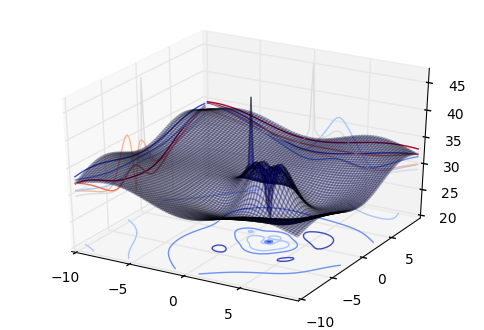

In [69]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


def show_f(f):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = y = np.arange(-10.0, 10.0, 0.25)
    X, Y = np.meshgrid(x, y)

    zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,alpha=0.2)

    cset = ax.contour(X, Y, Z, zdir='z', offset=20, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='y', offset=10, cmap=cm.coolwarm)
    ax.set_zlim(20, 47)

    plt.show()
    
show_f(f)

In [80]:
from random import uniform


def MC(f, xmin, xmax, ymin, ymax, n):
    X = [uniform(xmin, xmax) for _ in range(n)]
    Y = [uniform(ymin, ymax) for _ in range(n)]
    
    Z = [f(x,y) for x,y in zip(X,Y)]
    
    i = np.argmax(Z)
    return (X[i], Y[i])

In [135]:
x, y = MC(f, -10, 10, -10, 10, 1000)
print(f(x, y))

35.10239442613709


In [129]:
from scipy.stats import norm
    

def find_next_v(I, distribution, X, Y, u, xmin, xscale, ymin, yscale):
    plt.scatter(X, Y)
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
    v = [[scipy.stats.uniform.rvs(xmin, xscale), scipy.stats.uniform.rvs(0, xscale), scipy.stats.uniform.rvs(ymin, yscale), scipy.stats.uniform.rvs(0, yscale)] for _ in range(100)]
    
    Z = []
    for p in v:
        s = 0.0
        for i in range(len(I)):
            s += I[i] * log( distribution.pdf(X[i], p[0], p[1]) * distribution.pdf(Y[i], p[2], p[3]) + 0.0001 )
        s /= len(I)
        Z.append(s)
        
    i = np.argmax(Z)
    return v[i]

def find_next_v_uniform(I, distribution, X, Y, u):
    xmin = -5
    xscale = 10
    ymin = -5
    yscale = 10
    return find_next_v(I, distribution, X, Y, u, xmin, xscale, ymin, yscale)

def find_next_v_norm(I, distribution, X, Y, u):
    xmin = -5
    xscale = u[1]
    ymin = -5
    yscale = u[3]
    
    plt.scatter(X, Y)
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
    v = [[scipy.stats.uniform.rvs(xmin, 2*fabs(xmin)), scipy.stats.uniform.rvs(0, xscale), scipy.stats.uniform.rvs(ymin, 2*fabs(ymin)), scipy.stats.uniform.rvs(0, yscale)] for _ in range(100)]
    
    Z = []
    for p in v:
        s = 0.0
        for i in range(len(I)):
            s += I[i] * log( distribution.pdf(X[i], p[0], p[1]) * distribution.pdf(Y[i], p[2], p[3]) + 0.0001 )
        s /= len(I)
        Z.append(s)
        
    i = np.argmax(Z)
    return v[i]

def CE(f, u, N, q, maxk, distribution, solve):
    v = []
    v.append(u)
    
    S_max = []
    
    for t in range(1, maxk):
        X = [distribution.rvs(loc=v[t-1][0], scale=v[t-1][1]) for _ in range(N)]
        Y = [distribution.rvs(loc=v[t-1][2], scale=v[t-1][3]) for _ in range(N)]
        
        S = [f(x,y) for x,y in zip(X,Y)]
        SS = sorted(S)
        S_max.append(SS[-1])
        
        gamma = SS[q]
        
        I = [int(S[i] >= gamma) for i in range(N)]
        
        v_new = solve(I, distribution, X, Y, v[t-1])
        v.append(v_new)
        
    return (v[-1], S_max[-1])

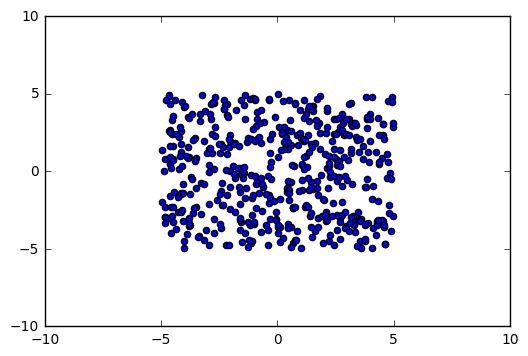

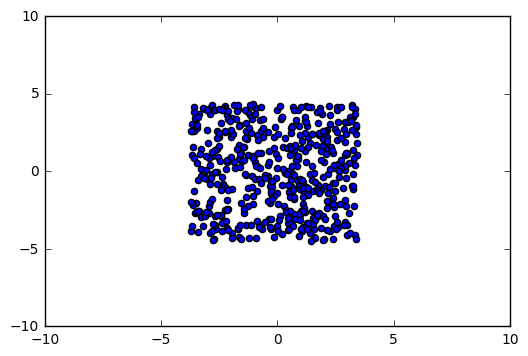

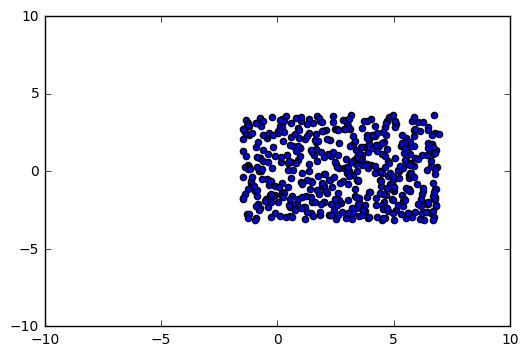

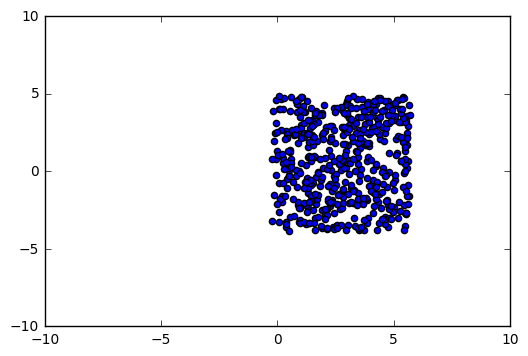

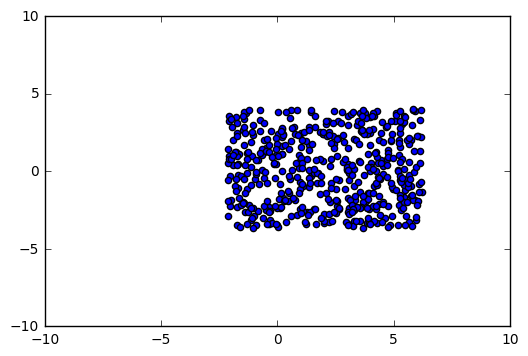

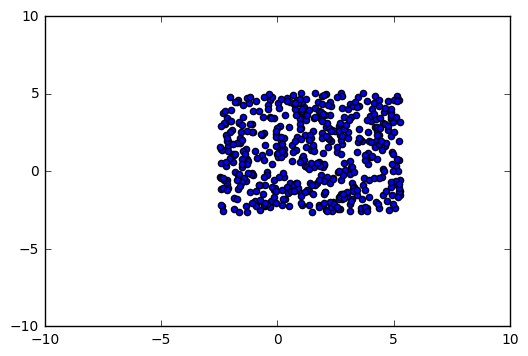

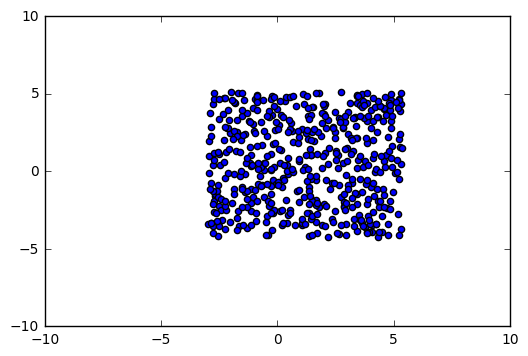

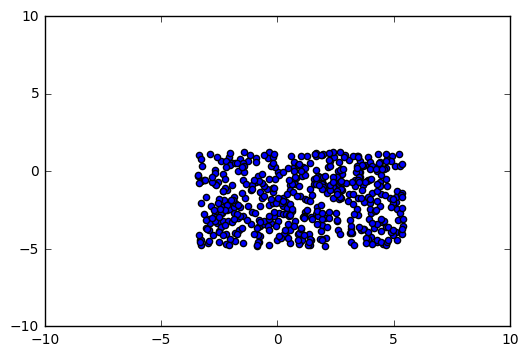

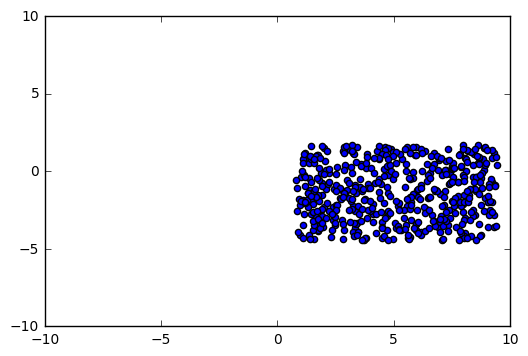

35.9540556883
35.6518207908


In [122]:
import scipy.stats


v, m = CE(f, [-5,10,-5,10], 500, 10, 10, scipy.stats.uniform, find_next_v_uniform)
print(m)

x, y = MC(f, v[0], v[0]+v[1], v[2], v[2]+v[3], 100000)
print(f(x, y))

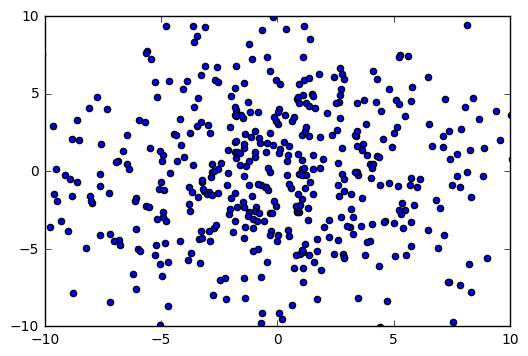

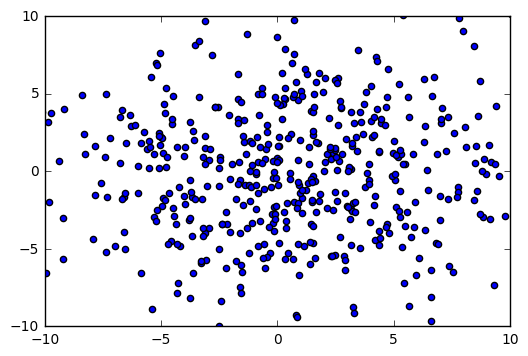

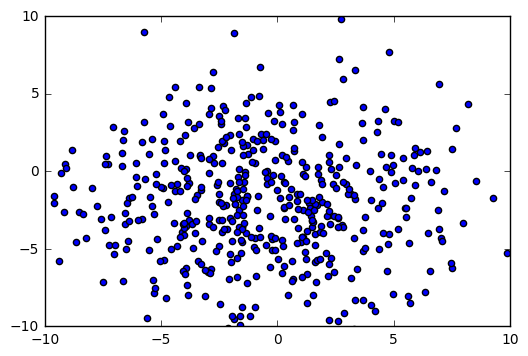

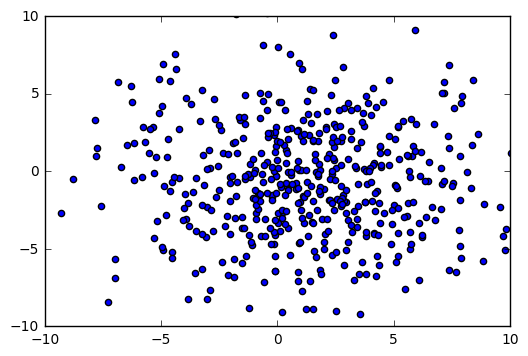

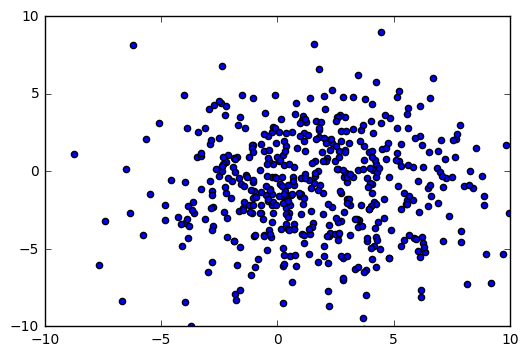

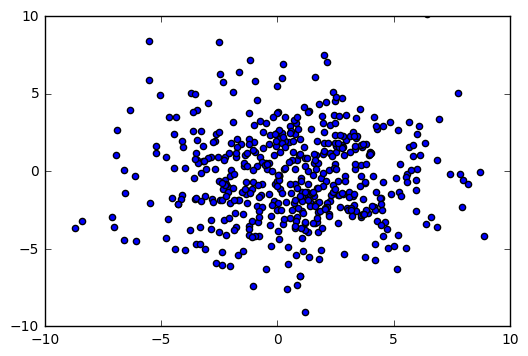

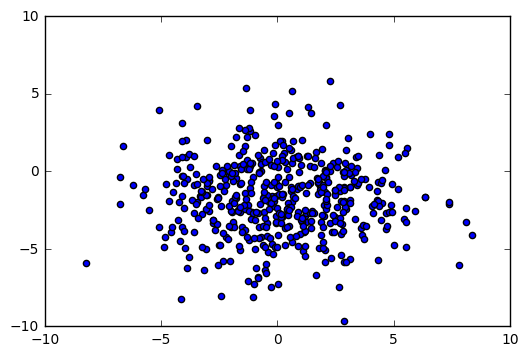

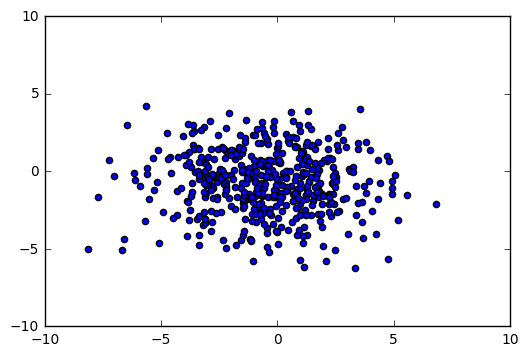

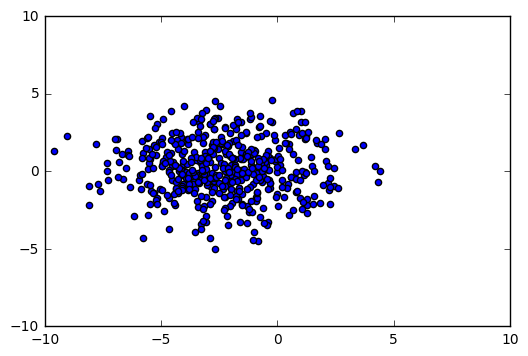

35.417783351


In [130]:
v, m = CE(f, [0,5,0,5], 500, 10, 10, scipy.stats.norm, find_next_v_norm)
print(m)

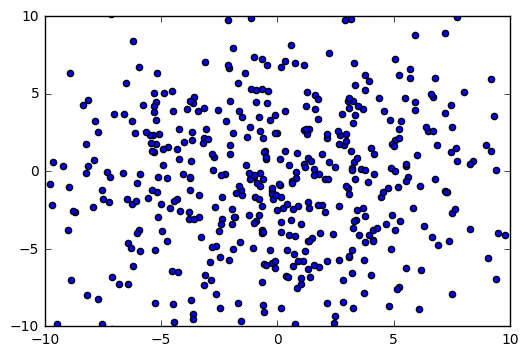

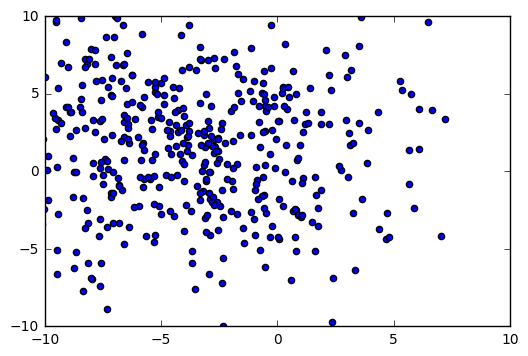

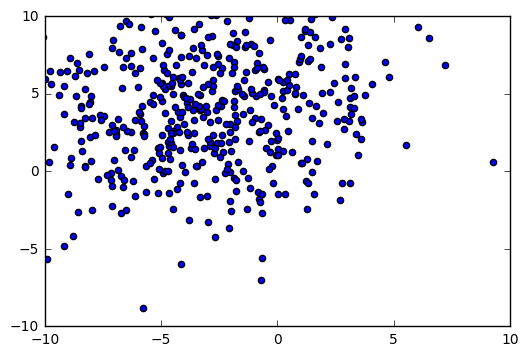

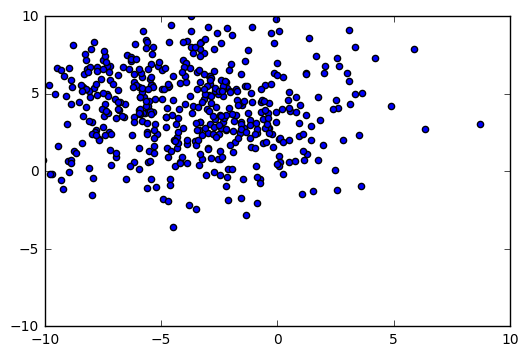

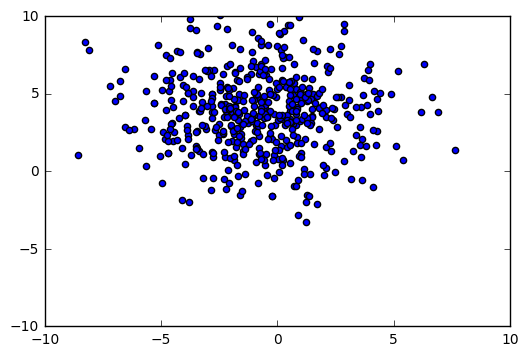

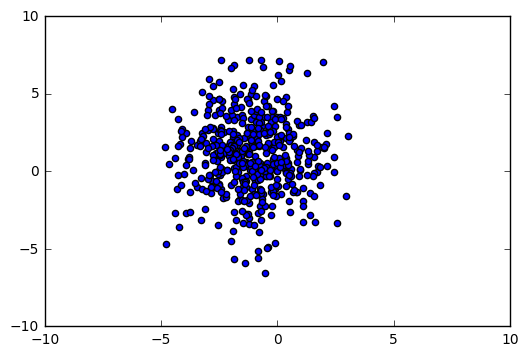

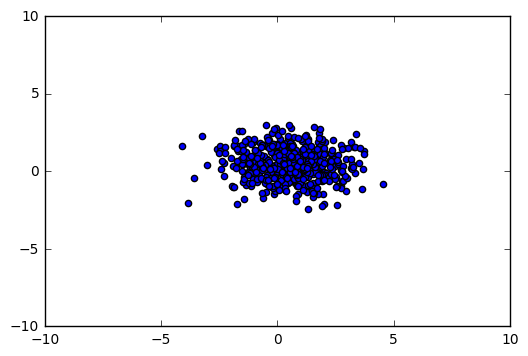

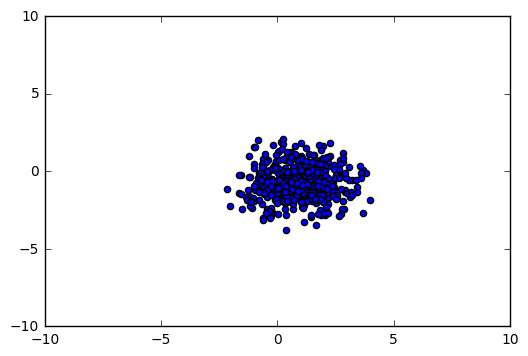

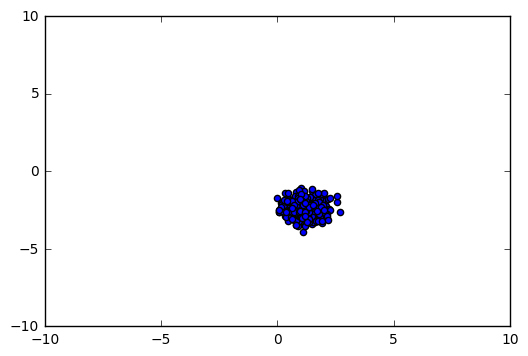

35.8018838033


In [138]:
v, m = CE(f, [0.0,5.0,0.0,5.0], 500, 400, 10, scipy.stats.norm, find_next_v_norm)
print(m)